In [94]:
import numpy as np
import matplotlib.pyplot as plt

size=100
total_x = np.array(range(size))
np.random.shuffle(total_x)
init_w = np.random.randint(5, size=1)
init_b = np.random.randint(0, 30, size)
total_y = total_x * init_w + init_b

print("init_w={0}, init_b={1}".format(init_w, init_b.sum()/len(init_b)))
print("first 20 elements of \nx: {0} \r\ny: {1}".format(total_x[:20], total_y[:20]))

train_x = total_x[:10]
train_y = total_y[:10]

loop=4
w=0
b=0
rate=0.0001
N = len(train_y)

init_w=[1], init_b=14.58
first 20 elements of 
x: [75 73  6 12 11 19 93 79 27  8 14 55 13 69 52 41 60 35  0 53] 
y: [104  97  17  39  14  27 100  91  50  24  26  62  21  87  70  48  74  61
   0  63]


w:1.197527215143938, b:0.02238467774363625


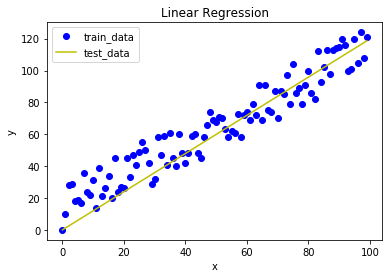

In [95]:
for i in range(loop):
    pred_y = w * train_x + b
    loss = ((train_y - pred_y) ** 2 / N).sum().astype(int)
    gradient_w = ((pred_y - train_y) * train_x * 2 / N).sum()#f'(w)=2/N*x*(wx+b-y)
    gradient_b = ((pred_y - train_y) * 2 / N).sum()#f'(b)=2/N*(wx+b-y)
#     print("loss={0}, w={1}, gradient_w={2}, b={3}, gradient_b={4}".format(loss, w, gradient_w, b, gradient_b))
    w = w - (rate * gradient_w)
    b = b - (rate * gradient_b)
print("w:{0}, b:{1}".format(w, b))

test_y = w * train_x + b

min_x = min(total_x)
max_x = max(total_x)
result_x = np.array([min_x, max_x])
result_y = np.array([w * min_x + b, w * max_x + b])
    
plt.plot(total_x, total_y, 'bo', label='train_data')
plt.plot(result_x, result_y, 'y', label='test_data')

plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [81]:
import keras
from keras import models
from keras import layers
from keras import optimizers

network = models.Sequential()
network.add(layers.Dense(1, input_shape=(1,)))


/DevTools/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [82]:
network.compile(optimizer='sgd',
                loss='mean_squared_error')
network.fit(train_x, train_y, epochs=10, batch_size=100)

Epoch 1/10
10/10 [==============================] - 0s 11ms/step - loss: 18136.1973
Epoch 2/10
10/10 [==============================] - 0s 102us/step - loss: 33594028.0000
Epoch 3/10
10/10 [==============================] - 0s 140us/step - loss: 62277738496.0000
Epoch 4/10
10/10 [==============================] - 0s 79us/step - loss: 115452562898944.0000
Epoch 5/10
10/10 [==============================] - 0s 81us/step - loss: 214029937030463488.0000
Epoch 6/10
10/10 [==============================] - 0s 359us/step - loss: 396775923264362905600.0000
Epoch 7/10
10/10 [==============================] - 0s 167us/step - loss: 735556786237358615822336.0000
Epoch 8/10
10/10 [==============================] - 0s 204us/step - loss: 1363600145359205278565793792.0000
Epoch 9/10
10/10 [==============================] - 0s 175us/step - loss: 2527888067330581896894108139520.0000
Epoch 10/10
10/10 [==============================] - 0s 148us/step - loss: 4686285463141820406369723330068480.0000
